In [15]:
"""

Links:
https://fortune.com/ranking/global500/search/?fortune500_y_n=true

Numerical Features:
'Rank', 'Name', 'Revenues ($M)', 'Revenue Percent Change',
'Profits ($M)', 'Profits Percent Change', 'Assets ($M)', 'Employees',
'Change in Rank', 'Years on Global 500 List'

Categorical Features:
Fortune Global 500 (Top 10 Specifically)
Female CEO

How the data will be used:
The data from the Fortune Global 500 will be used to answer two critically important questions. First, which factors influence a company's
profitability relative to revenue and second how the number of employyes correlate with revenue and profits. By analyzing the key statistics
of companies such as their revenue, profits, assets, number of employees, etc. we will be able to compare these values and see where the pattern 
lies between the most successful companies and companies that may not be most successful. Predictive modeling can be used to forecast a
company's future performance based on these statistics. 
"""
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

def get_df():
    url = "https://fortune.com/ranking/global500/search/"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    
    headers = [th.get_text(strip=True) for th in soup.find_all('th')]
    cleaned_headers = [header.replace('Remove', '') for header in headers]
    
    df = pd.DataFrame(columns = cleaned_headers)
    
    column_data = soup.find_all('td')
    
    data = []
    for td in column_data:
        if not td.find('a'):
            data.append(td.get_text(strip=True))
    
    num_columns = len(cleaned_headers)
    
    rows = [data[i:i + num_columns] for i in range(0, len(data), num_columns)]
    
    for row in rows:
        df.loc[len(df)] = row
    
    return df

df = get_df()
df.head()

#df.to_csv("Fortune 500 webscraping data.csv")
#Column for Female CEO 
#Save data to csv file 

,Rank,Name,Revenues ($M),Revenue Percent Change,Profits ($M),Profits Percent Change,Assets ($M),Employees,Change in Rank,Years on Global 500 List
0,1,Walmart,"$648,125",6%,"$15,511",32.8%,"$252,399","2,100,000",-,30
1,2,Amazon,"$574,785",11.8%,"$30,425",-,"$527,854","1,525,000",2,16
2,3,State Grid,"$545,947.5",3%,"$9,204.3",12.4%,"$781,126.2","1,361,423",-,24
3,4,Saudi Aramco,"$494,890.1",-18%,"$120,699.3",-24.1%,"$660,819.2","73,311",-2,6
4,5,Sinopec Group,"$429,699.7",-8.8%,"$9,393.4",-2.7%,"$382,688","513,434",1,26


In [16]:
# scrape companies with female ceos

# URL for the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_women_CEOs_of_Fortune_500_companies"

# Send GET request to the page
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

# Find the table
table = soup.find('table', {'class': 'wikitable'})

# Extract headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = [col.text.strip() for col in row.find_all('td')]
    rows.append(cols)

# Create DataFrame
df_female = pd.DataFrame(rows, columns=headers)

df_female


,CEO,Company,Fortune 500 rank,Start date
0,Karen S. Lynch,CVS Health,6,"February 1, 2021"
1,Mary T. Barra,General Motors,19,"January 1, 2014"
2,Gail K. Boudreaux,Elevance Health,20,"November 1, 2017"
3,Jane Fraser,Citigroup,21,"February 1, 2021"
4,Sarah London,Centene,22,"March 1, 2022"
5,Priscilla Almodovar,Fannie Mae,27,"December 1, 2022"
6,Carol B. Tomé,United Parcel Service,45,"June 1, 2020"
7,Susan Patricia Griffith,Progressive,62,"July 1, 2016"
8,Safra A. Catz,Oracle,89,"September 1, 2014"
9,Thasunda Brown Duckett,Tiaa,96,"May 1, 2021"


In [17]:
# curate the data
# change the datatype of the employees from strings to float
df['Employees'] = df['Employees'].str.replace(',', '', regex=False)
df['Employees'] = df['Employees'].astype(float)

# clean up the revenues metrics
df['Revenues ($M)'] = df['Revenues ($M)'].str.replace('$','', regex=False)
df['Revenues ($M)'] = df['Revenues ($M)'].str.replace(',','', regex=False)
df['Revenues ($M)'] = df['Revenues ($M)'].astype(float)

# clean up the profits metrics
df['Profits ($M)'] = df['Profits ($M)'].str.replace('$','', regex=False)
df['Profits ($M)'] = df['Profits ($M)'].str.replace(',','', regex=False)
df['Profits ($M)'] = df['Profits ($M)'].astype(float)

# clean up te assets metrics
df['Assets ($M)'] = df['Assets ($M)'].str.replace('$','', regex=False)
df['Assets ($M)'] = df['Assets ($M)'].str.replace(',','', regex=False)
df['Assets ($M)'] = df['Assets ($M)'].astype(float)

# clean up the rank metrics
df['Rank'] = df['Rank'].astype(int)

# drop the unnecessary columns
df.drop(['Revenue Percent Change', 'Profits Percent Change', 'Change in Rank'], axis=1, inplace=True)

# add asset turnover ratio
# this metric measures how efficiently a company is working
df['Asset Turnover Ratio'] = df['Revenues ($M)']/df['Assets ($M)']

# moving Asset Turnover Ratio to nearer another financials metrics
fifth_column = df.pop('Asset Turnover Ratio')
df.insert(5, 'Asset Turnover Ratio', fifth_column)

# sort the change in revenue to decreasing
#new_df = df.sort_values(by=['Employees'], ascending=False)

In [18]:
import numpy as np

X = df[['Employees']].values 
y = df['Revenues ($M)'].values  

# divide the training set and the test set
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)  
    indices = np.arange(len(X))
    np.random.shuffle(indices)  
    split_idx = int(len(X) * (1 - test_size)) 
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# data standardization
def standardize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

X_train_scaled, X_train_mean, X_train_std = standardize(X_train)
X_test_scaled = (X_test - X_train_mean) / X_train_std

y_train_scaled, y_train_mean, y_train_std = standardize(y_train)
y_test_scaled = (y_test - y_train_mean) / y_train_std

# add a bias item
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]) 
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

# regression coefficient
def closed_form_solution(X, y):
    XtX_inv = np.linalg.inv(np.matmul(X.T, X))  # (X^T X)^-1
    beta = np.matmul(XtX_inv, np.matmul(X.T, y))  # beta = (X^T X)^-1 X^T y
    return beta

beta_closed = closed_form_solution(X_train_scaled, y_train_scaled)

# evaluate performance
def evaluate(X, y, beta):
    y_pred = np.matmul(X, beta)
    mse = np.mean((y - y_pred) ** 2)  
    ss_total = np.sum((y - np.mean(y)) ** 2) 
    ss_residual = np.sum((y - y_pred) ** 2) 
    r_squared = 1 - (ss_residual / ss_total) 
    return mse, r_squared, y_pred

mse_closed, r_squared_closed, y_pred_test_closed = evaluate(X_test_scaled, y_test_scaled, beta_closed)
mse_gd, r_squared_gd, y_pred_test_gd = evaluate(X_test_scaled, y_test_scaled, beta_closed)

print(f"coefficients: {beta_closed}")
print(f"test set MSE: {mse_closed:.4f}, R2: {r_squared_closed:.4f}")





coefficients: [2.80808724e-18 5.67843394e-01]
test set MSE: 0.2926, R2: 0.6379


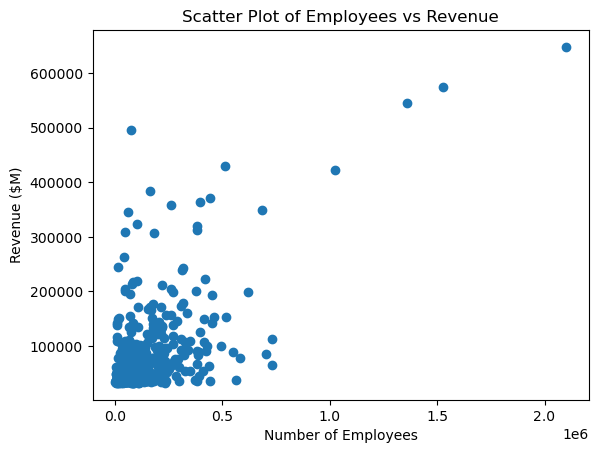

In [19]:
import matplotlib.pyplot as plt

# scatter plot
plt.scatter(df['Employees'], df['Revenues ($M)'])
plt.xlabel('Number of Employees')
plt.ylabel('Revenue ($M)')
plt.title('Scatter Plot of Employees vs Revenue')
plt.show()


In [20]:
import numpy as np

# Construct the design matrix X and target variable y
X = np.vstack([np.ones(len(df['Employees'])), df['Employees']]).T
y = df['Revenues ($M)'].values

# Calculate regression coefficients
XtX_inv = np.linalg.inv(np.matmul(X.T, X))
beta = np.matmul(XtX_inv, np.matmul(X.T, y))

print("Regression coefficients (Intercept and Slope):", beta)

Regression coefficients (Intercept and Slope): [4.48330441e+04 2.63492769e-01]


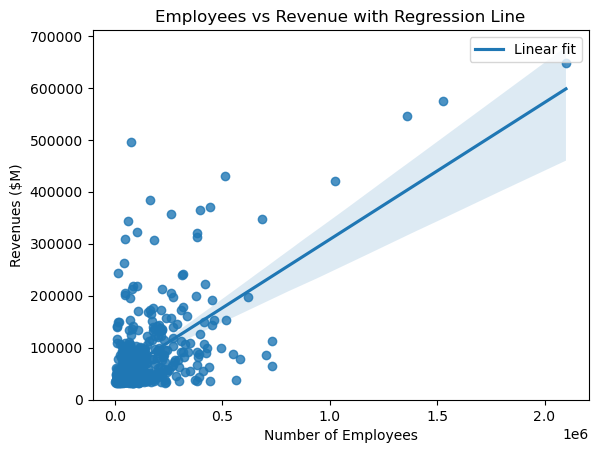

In [21]:
import seaborn as sns

sns.regplot(data=df, x='Employees', y='Revenues ($M)', fit_reg=True, line_kws={"label": "Linear fit"})
plt.xlabel('Number of Employees')
plt.ylabel('Revenues ($M)')
plt.title('Employees vs Revenue with Regression Line')
plt.legend()
plt.show()


In [22]:
correlation = np.corrcoef(df['Employees'], df['Revenues ($M)'])[0, 1]
print("correlation for employees and revenues:", correlation)


correlation for employees and revenues: 0.6145451700742834


In [23]:
X = df[['Employees']].values 
y = df['Revenues ($M)'].values  

# divide the training set and the test set
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)  
    indices = np.arange(len(X))
    np.random.shuffle(indices)  
    split_idx = int(len(X) * (1 - test_size)) 
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# data standardization
def standardize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

X_train_scaled, X_train_mean, X_train_std = standardize(X_train)
X_test_scaled = (X_test - X_train_mean) / X_train_std

y_train_scaled, y_train_mean, y_train_std = standardize(y_train)
y_test_scaled = (y_test - y_train_mean) / y_train_std

# add a bias item
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]) 
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

# gradient descent
def gradient_descent(X, y, learning_rate=0.001, n_iterations=1000):
    beta = np.random.randn(X.shape[1]) 
    losses = []
    for i in range(n_iterations):
        y_pred = np.matmul(X, beta) 
        error = y_pred - y 
        loss = np.mean(error ** 2) 
        losses.append(loss)
        gradient = (2 / len(y)) * np.matmul(X.T, error) 
        beta -= learning_rate * gradient 
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")
    return beta, losses

beta_gd, losses = gradient_descent(X_train_scaled, y_train_scaled, learning_rate=0.01, n_iterations=1000)

print(f"Coefficients: {beta_gd}")
print(f"Test Set MSE: {mse_gd:.4f}, R2: {r_squared_gd:.4f}")


Iteration 0, Loss: 0.7129
Iteration 100, Loss: 0.6782
Iteration 200, Loss: 0.6776
Iteration 300, Loss: 0.6776
Iteration 400, Loss: 0.6776
Iteration 500, Loss: 0.6776
Iteration 600, Loss: 0.6776
Iteration 700, Loss: 0.6776
Iteration 800, Loss: 0.6776
Iteration 900, Loss: 0.6776
Coefficients: [3.05221758e-12 5.67843394e-01]
Test Set MSE: 0.2926, R2: 0.6379


## Checking Assumptions
The test will include
- Linearity check
- Independence of Errors
- Constant Variance of Errors
- Normality of Residuals

The tests will be visualised in terms of graphs against residuals

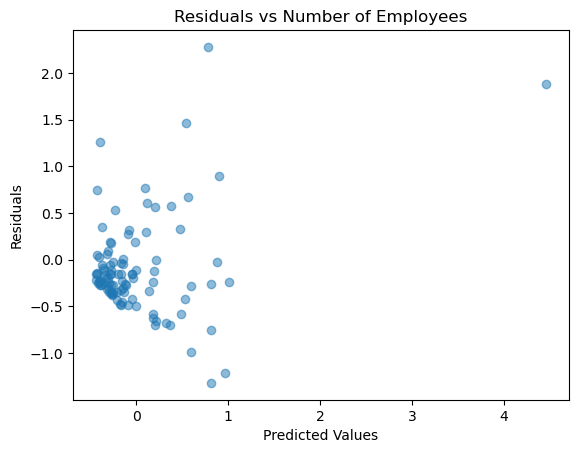

In [24]:
# check for constant variance/linearity using x features against residuals
residuals = y_test_scaled - y_pred_test_closed
plt.scatter(y_pred_test_closed, residuals, alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Number of Employees')
plt.show()

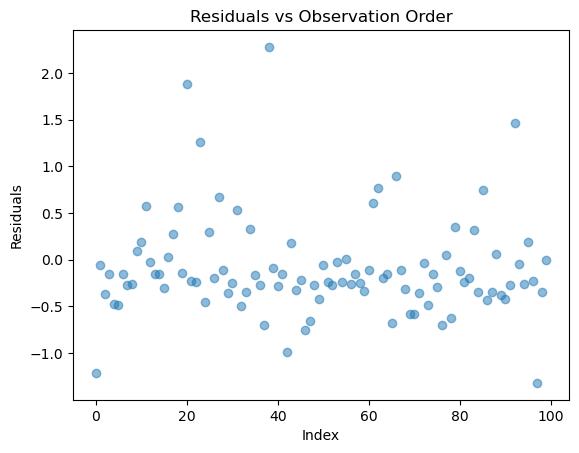

In [25]:
# check for independence using residuals vs observation order plot
order = np.arange(len(residuals))

# plot the figure
plt.scatter(order, residuals, alpha = 0.5)
plt.title('Residuals vs Observation Order')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

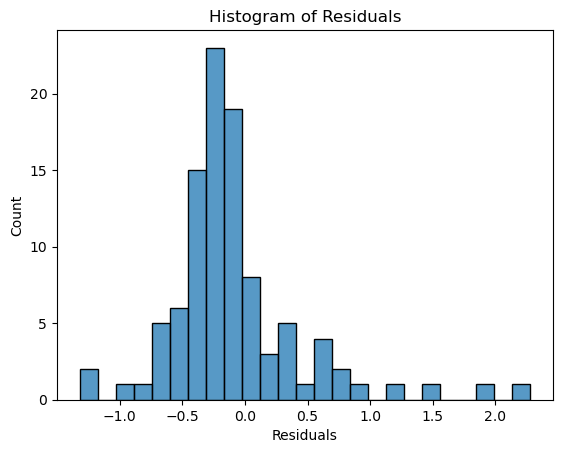

In [26]:
# check for normality using histogram of residuals and q-q plot
sns.histplot(residuals, kde=False)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

### Intepretation of assumptions check
1. Constant variance/Linearity check: We notice a cluster around the lower-left corner, which is not the desirable outcome (in a perfect scenario, we would like to see strong randomness). This could be due to several different reasons, including but not limited to: a strong group of outliers in the dataset, errors in transformation of data. We plan to introduce other indicators and conduct further investigations in the transformation of data to make sure the assumption is cleared.

2. Independence check: We notice a strong randomness in datapoints, spread out across the graph, hovering around 0, which means the model has satisfied this assumption.

3. Histogram of residuals: We do notice a slight skew to the left, however, maintains to be a normal bellcurve, centered around 0, which means the model has satisfied the normality assumption.

## Analysis

### Model Performance
The model evaluation provides several key insights about the relationship between the number of employees and revenue. The correlation coefficient of 0.6145 indicates a moderate positive correlation, and a R-squared value of 0.6379 on the test set indicates 64% of revenue variance can be explained by the size of workforce. However, the MSE of 0.2926 suggests there is a relatively high variation in this relationship, which means that other factors beyond employee numbers could be significantly influence the revenue. 

### Plot of Employees vs Revenue with Regression Line
Given the scatter plot with regression line, we see a clear positive trend line confirming the general relationship, while some significant scatters are shown around the regression line. There are several outliners, particularly among the companies with very small size of employee achieving exceptional revenue performance, which is possibily due to the development of modern technology or different business models. There is an increased scatter around the regression line for larger companies, suggestion that the revenue-employee relationship becomes more complex at larger scales.

### Gradient Descent Process
The Gradient Descent Training Process demonstrates robust model convergence. The loss values starts at 0.7129 and converges to 0.6776 by iteration 200. The stability after iteration 200 suggests that we reached an optimal solution for this linear model, which is a good sign. And The final steady loss value of 0.6776 confirms that our earlier observation about the moderate strength of this relationship.

### Overall
The analysis suggest that while workforce size remains a relevant significant factor in revenue generation and showing a positive relationship, its influence is moderated by other factors in the modern business environment. Modern business may achieve high revenue without relaying on large workforce.




## Discussion of Ethical Reasons
The project is deriving effects on financial indicators based on the personnnel structures of a company. Some ethical matters may entail:
- Financial indicators are derived from various factors, other than the personnel structures of an enterprise, therefore, fluctuation in financial perfomance attributed to personnel structure might harm a company's reputation, given that their performance is different from others
- Since we only have information regarding which company is run by a woman, it could unintentionally contribute to harmful stereotype, in the event that these companies' performance is weaker comapared to the rest.
- If poorly intepreted and implemented, the findings of the project might affect the hiring process, investment decision and other related policies regarding the future business of the companies, in the event that the female-led companies display weaker basic indicators compared to others.